# Project: Wrangling and Analyze Data

In [2]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import numpy as np
import seaborn as sns
import requests
import json
from timeit import default_timer as timer
import os
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'tweepy'

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

As instructed in the project overview, by clicking on the link provided in the classroom, the file is downloaded manually and read the data into a pandas DataFrame

In [2]:
# Use the read_csv function fo pandas to access the file after being downloaded
df_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder = 'weRateDogs' # Create a new folder with name WeRateDogs
if not os.path.exists(folder):
    os.makedirs(folder)
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'# url of file
response = requests.get(url)
with open(os.path.join(folder,url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
#use the read_csv format to create a dataframe for the downloaded file
df_twitter = pd.read_csv('weRateDogs/image-predictions.tsv', sep= '\t') 

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
df_1 = pd.read_csv('twitter-archive-enhanced-2.csv')

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Fail
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550

Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Fail
1062: 741303864243200000
Fail
1063: 741099773336379392
Fail
1064: 741067306818797568
Fail
1065: 740995100998766593
Fail
1066: 740711788199743490
Fail
1067: 740699697422163968
Fail
1068: 740676976021798912
Fail
1069: 740373189193256964
Fail
1070: 740365076218183684
Fail
1071: 740359016048689152
Fail
1072: 740214038584557568
Fail
1073: 739979191639244800
Fail
1074: 739932936087216128
Fail
1075: 739844404073074688
Fail
1076: 739623569819336705
Fail
1077: 739606147276148736
Fail
1078: 739544079319588864
Fail
1079: 739485634323156992
Fail
1080: 739238157791694849
Fail
1081: 738891149612572673
Fail
1082: 738885046782832640
Fail
1083: 738883359779196928
Fail
1084: 738537504001953792
Fail
1085: 738402415918125056
Fail
1086: 738184450748633089
Fail
1087: 738166403467907072
Fail
1088: 738156290900254721
Fail
1089: 737826014890496000
Fail
1090: 737800304142471168
Fail
1091: 737678689543020544
Fail
1092: 737445876994609152
Fail
1093: 737322739594330112
Fail
1094: 737310737551491075
Fail
1095:

Fail
1403: 699423671849451520
Fail
1404: 699413908797464576
Fail
1405: 699370870310113280
Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436:

Fail
1719: 680176173301628928
Fail
1720: 680161097740095489
Fail
1721: 680145970311643136
Fail
1722: 680130881361686529
Fail
1723: 680115823365742593
Fail
1724: 680100725817409536
Fail
1725: 680085611152338944
Fail
1726: 680070545539371008
Fail
1727: 680055455951884288
Fail
1728: 679877062409191424
Fail
1729: 679872969355714560
Fail
1730: 679862121895714818
Fail
1731: 679854723806179328
Fail
1732: 679844490799091713
Fail
1733: 679828447187857408
Fail
1734: 679777920601223168
Fail
1735: 679736210798047232
Fail
1736: 679729593985699840
Fail
1737: 679722016581222400
Fail
1738: 679530280114372609
Fail
1739: 679527802031484928
Fail
1740: 679511351870550016
Fail
1741: 679503373272485890
Fail
1742: 679475951516934144
Fail
1743: 679462823135686656
Fail
1744: 679405845277462528
Fail
1745: 679158373988876288
Fail
1746: 679148763231985668
Fail
1747: 679132435750195208
Fail
1748: 679111216690831360
Fail
1749: 679062614270468097
Fail
1750: 679047485189439488
Fail
1751: 679001094530465792
Fail
1752:

Fail
2052: 671488513339211776
Fail
2053: 671486386088865792
Fail
2054: 671485057807351808
Fail
2055: 671390180817915904
Fail
2056: 671362598324076544
Fail
2057: 671357843010908160
Fail
2058: 671355857343524864
Fail
2059: 671347597085433856
Fail
2060: 671186162933985280
Fail
2061: 671182547775299584
Fail
2062: 671166507850801152
Fail
2063: 671163268581498880
Fail
2064: 671159727754231808
Fail
2065: 671154572044468225
Fail
2066: 671151324042559489
Fail
2067: 671147085991960577
Fail
2068: 671141549288370177
Fail
2069: 671138694582165504
Fail
2070: 671134062904504320
Fail
2071: 671122204919246848
Fail
2072: 671115716440031232
Fail
2073: 671109016219725825
Fail
2074: 670995969505435648
Fail
2075: 670842764863651840
Fail
2076: 670840546554966016
Fail
2077: 670838202509447168
Fail
2078: 670833812859932673
Fail
2079: 670832455012716544
Fail
2080: 670826280409919488
Fail
2081: 670823764196741120
Fail
2082: 670822709593571328
Fail
2083: 670815497391357952
Fail
2084: 670811965569282048
Fail
2085:

{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.',), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.',), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.',), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.',), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.',), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.',), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.',), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.',), 856330835276025856: NotFound('404 Not Found\n144 - No status found with that ID.',), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.',), 851861385021730816: NotFound('404 Not Found\n144 - No status found with that ID.',), 845459076796616705: NotFound('404 Not Found\n144 - No status fou

In [4]:
# Create a dataframe to access the downloaded image predictions file
df_twitter = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# Check to confirm that dataframe was created
df_twitter.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [66]:
# Create a dataframe for the directly downloaded twitter file
df_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

In [67]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Open the tweet-json file, load the data into the workspace and create a dataframe with it

In [68]:
tweets_list = []
with open('tweet-json.txt','r') as file:
    for line in file:
        tweets = json.loads(line)
        tweets_list.append(tweets)
tweetcount = pd.DataFrame(tweets_list, columns = ['id', 'retweet_count', 'favorite_count'])

In [9]:
# Check to confirm that dataframe was successfully created
tweetcount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [10]:
tweetcount.head(20)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [11]:
# Summary statistics of the twitter archive
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# Summary statistics of the tweetcount dataframe
tweetcount.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [13]:
#Summary statistics of the image prediction file
df_twitter.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
tweetcount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [16]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Quality issues
### Twitter Archive Enhanced Table <br>
1. Timestamp datatype is object (string) and tweet_id datatype is integer

2. Some observations are retweets and replies. Only tweets should be used for the analysis.
3. None used in place of null in the dog stages

4. Wrong rating for tweeter id 810984652412424192 (The figure is referring to 24 hours 7 days a week rather than a rating)

  Wrong rating for tweeter id 666287406224695296  (The 1/2 is describing the dog and not a rating)

  Wrong rating for tweeter id 740373189193256964 ( Rating is actually 14/10. 9/11 refers to a date)

  Wrong rating for tweeter id 682962037429899265 (Rating is actually 10/10. 7/11 is the name of a location)

5. Some words are being wrongly interpreted as dog names

### Image Predictions Table
 6. Column Headers are not descriptive enough
 7. Some of the images are not pictures of dogs

### Json File Table
8. Id column should be renamed as tweet_id for uniformity and clarity

## Tidiness issues
1. Dog Stage should be in one column

2.Tweet count table and archive table should be merged in one dataframe

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

#### Make copies of the original data

In [17]:
# Make copies of original pieces of data
df_twitter_copy = df_twitter.copy() 

In [18]:
df_archive_copy = df_archive.copy()

In [19]:
tweetcount_copy = tweetcount.copy()

In [20]:
df_archive_copy.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #1:Twitter Archive- Some observations are retweets. Only tweets should be used for the analysis

#### Define:
First identify the index locations that have retweets and then remove these rows using the drop command. Then finally, remove all columns that have anything related to retweets using the drop command as well.

#### Code


##### Identify retweet rows that have non-null values in them

In [21]:
# Identify all rows that have not null values in their retweeted_status_id and in_reply_to_status_id fields
drop_retweet = df_archive_copy[pd.notnull(df_archive_copy['retweeted_status_id'])].index
drop_reply = df_archive_copy[pd.notnull(df_archive_copy['in_reply_to_status_id'])].index

##### Drop the identified rows

In [22]:
# Delete these rows using the drop command
df_archive_copy.drop(index=drop_retweet, inplace=True)
df_archive_copy.drop(index=drop_reply, inplace=True)

##### Drop the columns that are related to retweets as well

In [23]:
# Delete columns 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp' using the drop command
df_archive_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp'], axis = 1, inplace=True)

#### Test

In [24]:
df_archive_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Issue 2: Some of the Dogs Have Wrong Names

#### Define

Create an empty set where all places where there are no dog names (None) as well as wrong names (a, an, quite,some) are kept. Then replace all these names with the term No name with the replace function

#### Code

In [25]:
# Create an empty set for holding the identified dogs
empty_set = set()
# Add all names that start with a lower case or have None as dog name to the empty set
for x in df_archive_copy['name']:
    if x[0].islower():
        empty_set.add(x)
wrong_names = list((empty_set))+['None']
# Replace the identified names with the term No name
df_archive_copy['name'].replace(wrong_names,'No name',inplace=True)

#### Test

In [26]:
df_archive_copy['name'].value_counts()

No name      707
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Lola           8
Winston        8
Sadie          8
Daisy          7
Toby           7
Koda           6
Bailey         6
Jax            6
Oscar          6
Bella          6
Bo             6
Stanley        6
Milo           5
Leo            5
Scout          5
Dave           5
Buddy          5
Bentley        5
Chester        5
Rusty          5
Louis          5
George         4
Sophie         4
            ... 
Laela          1
Sparky         1
Daniel         1
Kendall        1
Beckham        1
Angel          1
Sonny          1
Hubertson      1
Tiger          1
Boots          1
Pip            1
Erik           1
Mary           1
Tedrick        1
Trigger        1
Tyrone         1
Tonks          1
Trevith        1
Jareld         1
Stefan         1
Goliath        1
Alejandro      1
Scott          1
Bobby          1
Raphael        1
BeBe           1
Mona           1
Rascal        

## Issue #3:
Timestamp datatype is object (string) and tweet_id is of datatype integer

#### Define
 Change the timestamp datatype to datetime format and the tweet_id datatype to string

#### Code

In [27]:
# Change timestamp format to datetime format
df_archive_copy.timestamp = pd.to_datetime(df_archive_copy.timestamp)

In [28]:
# Change the tweet id format to string format
df_archive_copy.tweet_id = df_archive_copy.tweet_id.astype('str')

#### Test

In [65]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 9 to 7147
Data columns (total 8 columns):
tweet_id              347 non-null object
timestamp             347 non-null datetime64[ns]
source                347 non-null object
text                  347 non-null object
rating_numerator      347 non-null int64
rating_denominator    347 non-null int64
name                  347 non-null object
dog_stage             347 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 24.4+ KB


## Issue #4:
#### None used in place of null in the dog stages that are empty

#### Define
#### Use the replace function to replace wherever None appears with null

### Code

##### Replace the None values for the dog stages with Nan

In [30]:
df_archive_copy['doggo'].replace('None',np.nan,inplace = True)
df_archive_copy['floofer'].replace('None',np.nan,inplace = True)
df_archive_copy['pupper'].replace('None',np.nan,inplace = True)
df_archive_copy['puppo'].replace('None',np.nan,inplace = True)

### Test

##### Observe the dataset

In [31]:
df_archive_copy.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,No name,NaN,NaN,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,No name,NaN,NaN,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


## Issue #5:
Wrong rating for tweeter ids 810984652412424192 , 666287406224695296, 832088576586297345, 740373189193256964 (The ratings for these ids are referring to timelines and locations and not actual ratings)

### Define

Use the drop command to remove the rows containing these values from the table

### Code

##### Use the drop command to target the indexes of the affect tweet_ids and delete them

In [33]:
df_archive_copy.drop([516,2335,1068], inplace=True)

### Test

##### Checking if those tweet_ids still exist in the dataset

In [34]:
df_archive_copy[df_archive_copy.tweet_id == ' 810984652412424192']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [35]:
df_archive_copy[df_archive_copy.tweet_id == ' 666287406224695296']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [36]:
df_archive_copy[df_archive_copy.tweet_id == '832088576586297345']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Issue 7: Image Predictions Table

###  Column Headers are not descriptive enough


### Define
Replace column headers in the table with more descriptive headers using the rename function

### Code

##### Rename the columns with more descriptive names

In [37]:
df_twitter_copy = df_twitter_copy.rename(columns = {'p1':'predict1','p1_conf':'conf_level_predict1','p2':'predict2','p2_conf':
                                                    'conf_level_predict2','p3':'predict3','p3_conf':'conf_level_predict3'})

### Test

##### Observe the dataset

In [38]:
df_twitter_copy.head(1)

,tweet_id,jpg_url,img_num,predict1,conf_level_predict1,p1_dog,predict2,conf_level_predict2,p2_dog,predict3,conf_level_predict3,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Issue 8: Some Images are not pictures of dogs

### Define

Where p1, p2 and p3 is false, that means that the image being checked is not that of a dog's. Therefore, it needs to be dropped.

### Code

##### Identify rows where p1_dog, p2_dog and p3_dog are false

In [39]:
# create a new column with all indexes of the dataset that have p1_dog,p2_dog and p3_dog as false
not_dogs_index=df_twitter_copy.query('p1_dog==False and p2_dog==False and p3_dog==False').index

In [40]:
# drop the affected rows
df_twitter_copy.drop(not_dogs_index,inplace=True)

### Test

##### Check the dataset

In [41]:
len(df_twitter_copy.query('p1_dog==False and p2_dog==False and p3_dog==False'))

0

## Issue 8: Json Twitter File column header id not descriptive enough

### Define

 Use the rename function to replace the column header name "id" with "tweet_id" and then change it to string format

### Code

##### Rename the id column as the tweet_id and change the datatype

In [42]:
tweetcount_copy = tweetcount_copy.rename(columns = {'id':'tweet_id'})

In [43]:
tweetcount_copy.tweet_id = tweetcount_copy.tweet_id.astype('str')

### Test

##### Observe the dataset

In [44]:
tweetcount_copy.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [45]:
tweetcount_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## Tidyness Issues

### Issue 1: Dog Stages are in different columns

### Define

Use the melt function to combine all the dog stage columns into one column and then remove the all null values in the dog stage columns using the dropna function. Then remove the new column generated using the drop command

### Code

##### Pivot all the dog stages into one column

In [46]:
df_archive_copy = pd.melt(df_archive_copy, id_vars=['tweet_id','timestamp','source', 'text', 'rating_numerator','rating_denominator'
                                               ,'name'],var_name='dog_stage',value_name = 'Value',value_vars = ['doggo','floofer','pupper','puppo'])

##### Drop the rows where the Value column data is NaN

In [47]:
df_archive_copy.dropna(subset=['Value'], inplace=True)

##### Drop the not needed column

In [48]:
df_archive_copy.drop(['Value'],axis = 1, inplace = True)

In [49]:
df_archive_copy

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo
39,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo
86,872967104147763200,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,12,10,No name,doggo
94,871515927908634625,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo
95,871102520638267392,2017-06-03 20:33:19,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14,10,No name,doggo
104,869596645499047938,2017-05-30 16:49:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,12,10,Scout,doggo
143,858843525470990336,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,13,10,No name,doggo
154,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,No name,doggo
161,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11,10,No name,doggo
192,846514051647705089,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,13,10,Barney,doggo


### Test

##### Inspect the dataset

In [50]:
df_archive_copy.dog_stage.value_counts()

pupper     230
doggo       83
puppo       24
floofer     10
Name: dog_stage, dtype: int64

### Issue 2: Multiple tables for the Data

### Define

Merge all three dataframes into one dataframe for clarity and to reduce memory usage using the merge function of pandas. We need to also change the tweet_id datatype from int64 to str for the image prediction file so the merge can be successful

### Code

##### Change data type of tweet_id column to string

In [51]:
df_twitter_copy.tweet_id = df_twitter_copy.tweet_id.astype('str')

##### Merge the 3 files using the tweet_id column as the common column 

In [52]:
df_archive_clean = pd.merge(df_archive_copy, tweetcount_copy, on = ['tweet_id'], how = 'left')

In [53]:
df_archive_clean = pd.merge(df_archive_clean, df_twitter_copy, on = ['tweet_id'], how = 'left' )

In [54]:
df_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,predict1,conf_level_predict1,p1_dog,predict2,conf_level_predict2,p2_dog,predict3,conf_level_predict3,p3_dog
0,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,7711,32467,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,3128,20771,...,1.0,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
2,872967104147763200,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,12,10,No name,doggo,5669,28031,...,2.0,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
3,871515927908634625,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,3628,20730,...,2.0,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
4,871102520638267392,2017-06-03 20:33:19,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14,10,No name,doggo,5764,21461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,869596645499047938,2017-05-30 16:49:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,12,10,Scout,doggo,3327,16476,...,1.0,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
6,858843525470990336,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,13,10,No name,doggo,3771,16304,...,1.0,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
7,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,No name,doggo,19196,47844,...,1.0,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
8,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11,10,No name,doggo,3433,17169,...,1.0,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True
9,846514051647705089,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,13,10,Barney,doggo,13076,48410,...,2.0,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True


### Test

##### Inspect the dataset

In [55]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 346
Data columns (total 21 columns):
tweet_id               347 non-null object
timestamp              347 non-null datetime64[ns]
source                 347 non-null object
text                   347 non-null object
rating_numerator       347 non-null int64
rating_denominator     347 non-null int64
name                   347 non-null object
dog_stage              347 non-null object
retweet_count          347 non-null int64
favorite_count         347 non-null int64
jpg_url                266 non-null object
img_num                266 non-null float64
predict1               266 non-null object
conf_level_predict1    266 non-null float64
p1_dog                 266 non-null object
predict2               266 non-null object
conf_level_predict2    266 non-null float64
p2_dog                 266 non-null object
predict3               266 non-null object
conf_level_predict3    266 non-null float64
p3_dog                 266 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

##### Saving cleaned file

In [56]:
df_archive_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

##### Plotting a histogram of all the datasets for inspection

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D30453DBA8>,
      dtype=object)

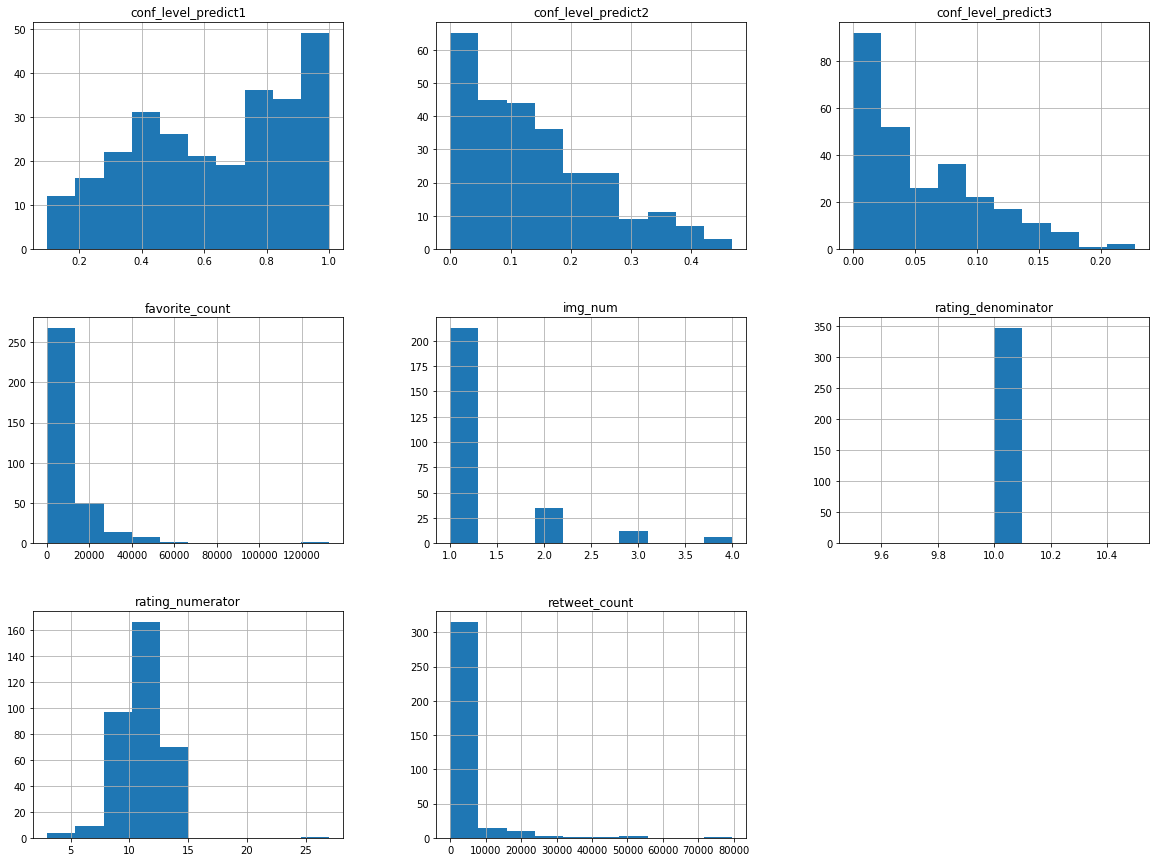

In [57]:
df_archive_clean.hist(figsize=(20,15))

##### histogram of rating numerator

Text(0.5,1,'Plot of Frequency of Occurrence of Different Ratings')

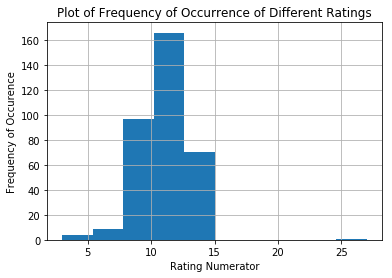

In [58]:
df_archive_clean['rating_numerator'].hist()
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency of Occurence')
plt.title('Plot of Frequency of Occurrence of Different Ratings')

##### histogram of rating denominator

Text(0.5,1,'Plot of Frequency of Occurrence of Different Rating Denominators')

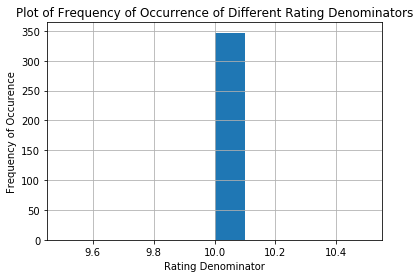

In [59]:
df_archive_clean['rating_denominator'].hist()
plt.xlabel('Rating Denominator')
plt.ylabel('Frequency of Occurence')
plt.title('Plot of Frequency of Occurrence of Different Rating Denominators')

##### histogram of confidence level of second image prediction

Text(0.5,1,'Plot of Confidence Level for Second Image Prediction VS Frequency')

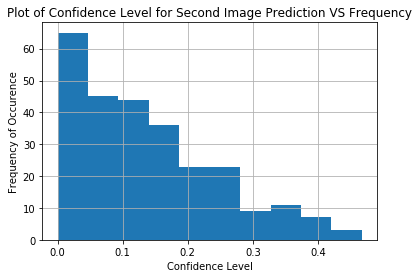

In [60]:
df_archive_clean['conf_level_predict2'].hist()
plt.xlabel('Confidence Level')
plt.ylabel('Frequency of Occurence')
plt.title('Plot of Confidence Level for Second Image Prediction VS Frequency')

##### histogram of confidence level of first image prediction

Text(0.5,1,'Plot of Confidence Level for First Image Prediction VS Frequency')

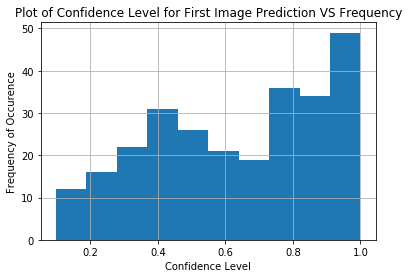

In [61]:
df_archive_clean['conf_level_predict1'].hist()
plt.xlabel('Confidence Level')
plt.ylabel('Frequency of Occurence')
plt.title('Plot of Confidence Level for First Image Prediction VS Frequency')

##### Pie chart of sources of tweets

<Figure size 1440x1440 with 0 Axes>

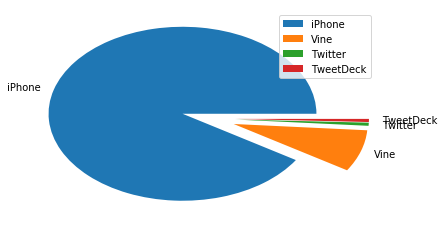

<Figure size 1440x1440 with 0 Axes>

In [62]:
mylabels = ['iPhone','Vine','Twitter','TweetDeck']
plt.pie(df_archive_clean.source.value_counts(), labels=mylabels,explode = [0.2, 0.2, 0.2, 0.2])
plt.legend()
plt.figure(figsize=[20,20])

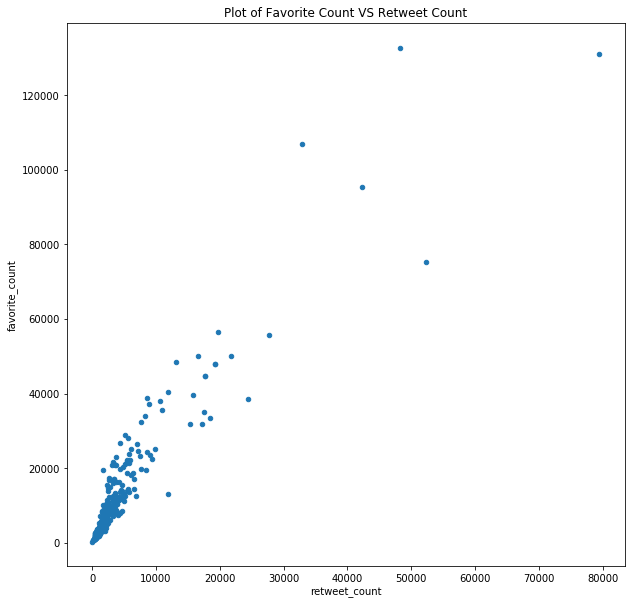

In [63]:
df_archive_clean.plot(x='retweet_count',y='favorite_count', kind = 'scatter', title = 'Plot of Favorite Count VS Retweet Count',figsize = (10,10))


### Insights:
1. Most of the images used in the dataset are sourced using an iPhone version of the Twitter app

2. There is a positive correlation between the retweet count and the favorite count

3. The confidence levels for the first and third predictions of the images using the neural networks are skewed towards the right

### Visualization

##### Scatter plot of retweet count vs favorite count

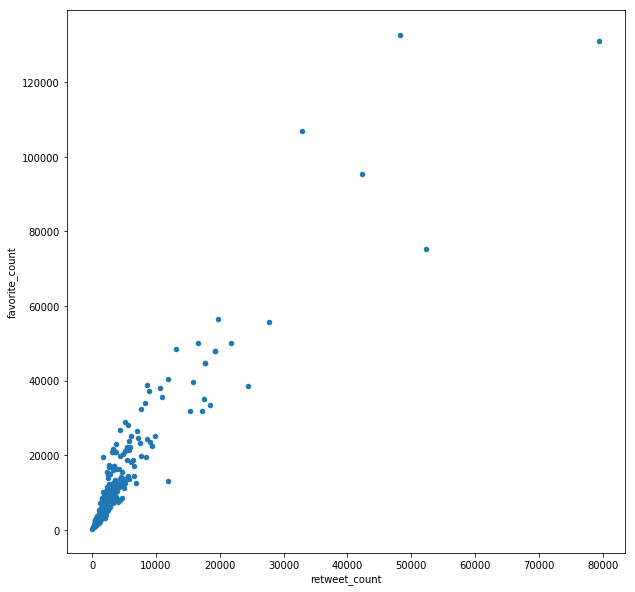

In [64]:
df_archive_clean.plot(x='retweet_count',y='favorite_count', kind = 'scatter', figsize = (10,10))